In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [2]:
# ibdb 데이터 불러오기
# 단어사전은 500개까지만 가져옴
# 원핫인코딩하면 500개 컬럼이 만들어짐
(train_input, train_target), (test_input, test_target) = keras.datasets.imdb.load_data(
    num_words = 500
)

In [3]:
print(train_input.shape, test_input.shape   )

(25000,) (25000,)


In [4]:
# 1의 의미 : 토큰시작
# 2의 의미 : 단어사전에 없는 단어
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [5]:
# 2진 분류 : 긍정(1), 부정(0)
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [6]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [7]:
print(train_input.shape, val_input.shape)

(20000,) (5000,)


In [8]:
train_input[0]
len(train_input[0])

259

In [9]:
type(train_input)

numpy.ndarray

In [10]:
lengths = np.array([len(x) for x in train_input])
lengths

array([259, 520, 290, ..., 300,  70,  77])

In [11]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


In [12]:
np.max(lengths)

1854

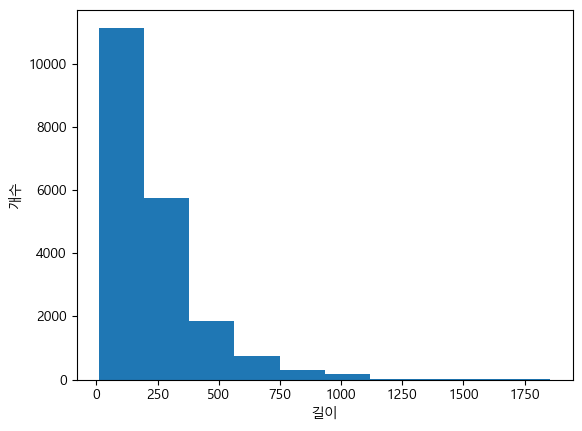

In [13]:
plt.hist(lengths)
plt.xlabel('길이')
plt.ylabel('개수')
plt.show()

In [14]:
# 시퀀스 패딩 : 글자의 수를 제한해서 없는 부분은 0으로 채워줌
# 최대 글자수 100개 제한
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

In [15]:
train_input.shape

(20000,)

In [16]:
# 20000개 샘플의 크기 : 100
train_seq.shape

(20000, 100)

In [17]:
# 시퀀스 패딩 적용해서 0이 없으면 글자 짤린것
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [18]:
# 시퀀스 패딩은 100개 이상의 글자를 자를 때 앞부분을 자름. 뒤부분 내용이 더 중요하다고 판단하기 때문
# print(train_input[0]) # [6, 2, 46, 7, 14, 20, 10, 10, 470, 158 ... ] ==> 위와 상이
print(train_input[0][-10:]) # [6, 2, 46, 7, 14, 20, 10, 10, 470, 158] ==> 뒷부분 일치

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [19]:
# 6번째 샘플은 앞부분 0으로 채워져 있음 ==> 100개 단어보다 적은 데이터 임. 
# print(train_seq[0]) ~ print(train_seq[4]) : 앞부분이 0으로 채워져 있지 않음
print(train_seq[5]) # [  0   0   0   0   1   2 195  19  49 ... ]

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [20]:
# 0값으로 : fillna 사용 
# 최빈값으로 : value_count()에서 2번째 값(첫번째 값은 index)
# 최대값으로 : max 사용

In [21]:
# 검증세트 : 시퀀스패딩
val_seq = pad_sequences(val_input, maxlen=100)

In [22]:
# 순환신경망 모델 구현
model = keras.Sequential()
# 순환신경망 알고리즘
# 시퀀스패딩 : 100 크기(단어의 길이가 100개), 단어사전 : 500개
# dense층 : 8
model.add(keras.layers.SimpleRNN(8,input_shape=(100, 500)))
# 이진분류
model.add(keras.layers.Dense(1,activation='sigmoid'))

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
# fit 훈련 데이터 3차원 행렬
train_seq[0]

array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
       451,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10, 470, 158])

In [24]:
train_oh = keras.utils.to_categorical(train_seq) # 원핫인코딩으로 바뀜

In [25]:
train_oh

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]],

       [[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0.

In [26]:
train_seq[0]

array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
       451,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10, 470, 158])

In [27]:
train_seq[0][0:3]

array([10,  4, 20])

In [28]:
train_seq[0][0:20]

array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2])

In [29]:
train_seq[0][0] # 10

10

In [30]:
train_oh[0].shape #(100, 500)
train_oh[1].shape #(100, 500)

(100, 500)

In [31]:
# 원핫인코딩 된 값 출력 : 10번째 값이 1로 변경
train_oh[0][0][:12] # [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1. ... ] ==> 10번째 값이 1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [32]:
# 500개 컬럼의 합은 무조건 1 ==> 원핫인코딩
print(np.sum(train_oh[0][0]))

1.0


In [33]:
# val_seq 원핫인코딩
val_oh = keras.utils.to_categorical(val_seq)

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 8)              │         4,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,081 (15.94 KB)

 Trainable params: 4,081 (15.94 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# 인공신경망 훈련 동일
# Flatten 필요 없음. 원핫인코딩
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
# 콜백모델체크포인트 
checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRnn_model.keras')
# 종기종료 
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True )
# 모델훈련 
history = model.fit(train_oh,train_target,batch_size=64,epochs=100,
                    validation_data=(val_oh,val_target), callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.4797 - loss: 0.7068 - val_accuracy: 0.5002 - val_loss: 0.6998
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5138 - loss: 0.6946 - val_accuracy: 0.5348 - val_loss: 0.6914
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5499 - loss: 0.6848 - val_accuracy: 0.5922 - val_loss: 0.6731
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6225 - loss: 0.6575 - val_accuracy: 0.6418 - val_loss: 0.6426
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6792 - loss: 0.6173 - val_accuracy: 0.6956 - val_loss: 0.6081
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.7017 - loss: 0.5999 - val_accuracy: 0.7084 - val_loss: 0.5906
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7227 - loss: 0.5789 - val_accuracy: 0.7072 - val_loss: 0.5863
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7286 - loss: 0.5660 -

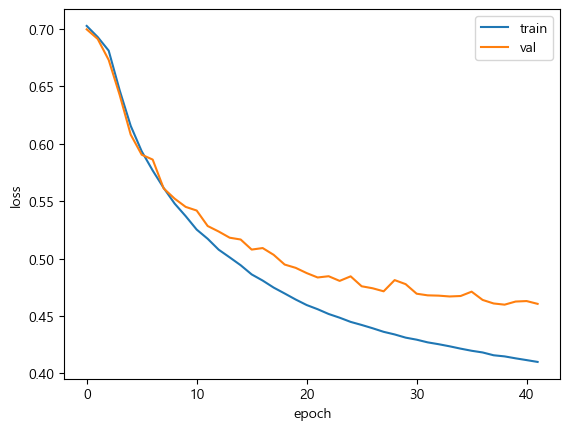

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [37]:
# stop 위치


In [38]:
# history.hi

In [49]:
# test_input
# 시퀀스 패딩
test_seq = pad_sequences(test_input, maxlen=100)
# 원핫인코딩
train_oh = keras.utils.to_categorical(test_seq)
model.evaluate(train_oh, test_target)

MemoryError: Unable to allocate 9.31 GiB for an array with shape (2500000, 500) and data type float64

단어 임베딩

In [43]:
model2 = keras.Sequential()
# 임베딩층 추가
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

In [46]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
# 인공신경망 훈련 동일
# Flatten 필요 없음. 
# 원핫인코딩을 사용하지 않음. -- > 임베딩 사용 ==> train_oh -> train_seq 사용
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
# 콜백모델체크포인트 
checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRnn_embedding_model.keras')
# 종기종료 
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True )
# 모델훈련 : train_oh -> train_seq 사용
history = model2.fit(train_seq,train_target,batch_size=64,epochs=100,
                    validation_data=(val_seq,val_target), callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5382 - loss: 0.6879 - val_accuracy: 0.6806 - val_loss: 0.6225
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7077 - loss: 0.6049 - val_accuracy: 0.7280 - val_loss: 0.5841
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7424 - loss: 0.5696 - val_accuracy: 0.7516 - val_loss: 0.5571
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7557 - loss: 0.5487 - val_accuracy: 0.7586 - val_loss: 0.5389
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7737 - loss: 0.5253 - val_accuracy: 0.7538 - val_loss: 0.5304
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7758 - loss: 0.5116 - val_accuracy: 0.7660 - val_loss: 0.5156
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7767 - loss: 0.5005 - val_accuracy: 0.7558 - val_loss: 0.5168
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7816 - loss: 0.4898 - 

In [51]:
model2.evaluate(test_seq, test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7879 - loss: 0.4643


[0.4635436236858368, 0.7870399951934814]

In [52]:
# 시퀀스 패딩
test_seq = pad_sequences(test_input, maxlen=100)
# 원핫인코딩
# train_oh = keras.utils.to_categorical(test_seq)
model.evaluate(test_seq, test_target)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_1/Cast:0", shape=(None, 100), dtype=float32). Expected shape (None, 100, 500), but input has incompatible shape (None, 100)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 100), dtype=int32)
  • training=False
  • mask=None

In [41]:
# 딥러닝 훈련
# 데이터전처리 train_seq = pad_sequences(train_input, maxlen=100)
# 모델결정 model = keras.Sequential()
# 순환신경망(RNN)

# model2.add(keras.layers.Embedding(500, 16, input_length=100))
# model.add(keras.layers.SimpleRNN(8,input_shape=(100, 500)))
# model.add(keras.layers.Dense(1,activation='sigmoid'))
# model.summary()


# 합성곱 신경망 (CNN)
# 1차 합성곱 신경망
# model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'),
#                                input_shape=(28,28,1))
# 최대풀링 model.add(keras.layers.MaxPooling2D(2))
# 2차 합성곱 신경망
# model.add( keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same') )
# model.add(keras.layers.MaxPooling2D(2))


# 인공신경망 훈련 동일
# Flatten 필요 없음. 원핫인코딩
# rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
# model.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
# 콜백모델체크포인트 
# checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRnn_model.keras')
# 종기종료 
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True )
# 모델훈련 
# history = model.fit(train_seq,train_target,batch_size=64,epochs=100,
#                     validation_data=(val_seq,val_target), callbacks=[checkpoint_cb,early_stopping_cb])
# 시퀀스 패딩 test_seq = pad_sequences(test_input, maxlen=100)
# 원핫인코딩 
# train_oh = keras.utils.to_categorical(test_seq)
# model.evaluate(test_seq, test_target)



# Flatten 추가  model.add(keras.layers.Flatten())
# Dense층 추가  model.add(keras.layers.Dense(100,activation='relu'))
# 드롭아웃추가  model.add(keras.layers.Dropout(0.4)) # 40%를 제외시키는 규제적용
# Dense층 추가  model.add(keras.layers.Dense(10,activation='softmax'))
# 모델설정 옵티마이저 - adam
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 콜백모델체크포인트 checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
# 종기종료 early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True )
# 모델훈련 history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,
#                      validation_data=(val_scaled,val_target), callbacks=[checkpoint_cb,early_stopping_cb])
# 모델평가 model.evaluate(val_scaled,val_target)
# test세트 검증 - 3차원행렬로 변경해서 test진행해야 함.
# test_scaled = test_input.reshape(-1,28,28,1)/255.0
# model.evaluate(test_scaled,test_target)